In [2]:
from __future__ import division
from builtins import range
import numpy as np
np.seterr(divide='ignore') # these warnings are usually harmless for this code
np.random.seed(0)
import pyhsmm
from pyhsmm.util.text import progprint_xrange

In [8]:
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [5]:
###############
#  load data  #
###############

data = np.loadtxt('example-data.txt')[:2500]
T = data.shape[0]

In [6]:
#########################
#  posterior inference  #
#########################

# Set the weak limit truncation level
Nmax = 25

# and some hyperparameters
obs_dim = data.shape[1]
obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.25,
                'nu_0':obs_dim+2}

# HMM-HDP

.........................  [  25/100,    0.02sec avg, ETA 1.63 ]
.........................  [  50/100,    0.02sec avg, ETA 1.06 ]
.........................  [  75/100,    0.02sec avg, ETA 0.52 ]
.........................  [ 100/100,    0.02sec avg, ETA 0.00 ]

   0.02sec avg, 2.08 total



Text(0.5,0.98,'HDP-HMM sampled model after 100 iterations')

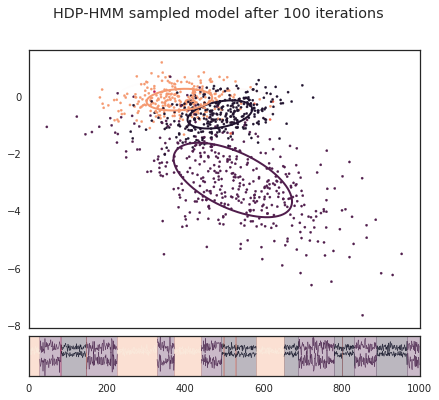

In [14]:
### HDP-HMM
obs_distns = [pyhsmm.distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
posteriormodel = pyhsmm.models.WeakLimitHDPHMM(alpha=6.,gamma=6.,
                                               init_state_concentration=1.,
                                   obs_distns=obs_distns)
posteriormodel.add_data(data)

for idx in progprint_xrange(100):
    posteriormodel.resample_model()


print(posteriormodel.states_list)
    
posteriormodel.plot()
plt.gcf().suptitle('HDP-HMM sampled model after 100 iterations')

..........
   0.02sec avg, 0.15 total

.........................  [  25/100,    0.02sec avg, ETA 1.54 ]
.........................  [  50/100,    0.02sec avg, ETA 1.02 ]
.........................  [  75/100,    0.02sec avg, ETA 0.51 ]
.........................  [ 100/100,    0.02sec avg, ETA 0.00 ]

   0.02sec avg, 2.03 total

.........................  [  25/100,    0.02sec avg, ETA 1.62 ]
.........................  [  50/100,    0.02sec avg, ETA 1.08 ]
.........................  [  75/100,    0.02sec avg, ETA 0.52 ]
.........................  [ 100/100,    0.02sec avg, ETA 0.00 ]

   0.02sec avg, 2.07 total



Text(0.5,0.98,'Sticky HDP-HMM sampled model after 100 iterations')

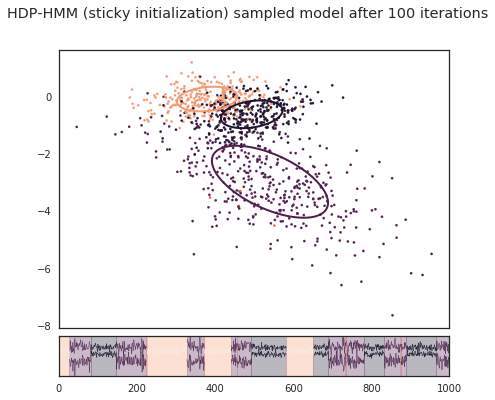

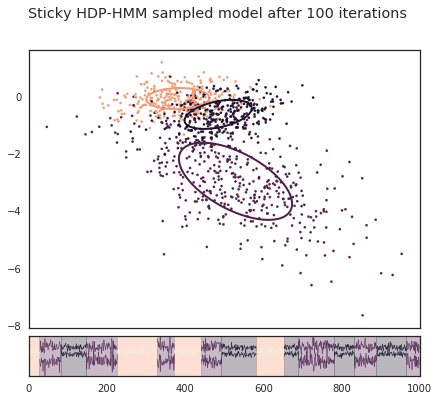

In [12]:
### HDP-HMM with "sticky" initialization
obs_distns = [pyhsmm.distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
posteriormodel = pyhsmm.models.WeakLimitHDPHMM(alpha=6.,gamma=6.,
                                               init_state_concentration=1.,
                                   obs_distns=obs_distns)

# Start with a "sticky" state sequence
z_init = np.random.randint(0, Nmax, size=(T//5)).repeat(5)
posteriormodel.add_data(data, stateseq=z_init)

# Initialize the parameters of the model, holding the stateseq fixed
for _ in progprint_xrange(10):
    posteriormodel.resample_parameters()

for idx in progprint_xrange(100):
    posteriormodel.resample_model()
    
posteriormodel.plot()
plt.gcf().suptitle('HDP-HMM (sticky initialization) sampled model after 100 iterations')

# Sticky HDP-HMM

.........................  [  25/100,    0.02sec avg, ETA 1.62 ]
.........................  [  50/100,    0.02sec avg, ETA 1.05 ]
.........................  [  75/100,    0.02sec avg, ETA 0.52 ]
.........................  [ 100/100,    0.02sec avg, ETA 0.00 ]

   0.02sec avg, 2.07 total



Text(0.5,0.98,'Sticky HDP-HMM sampled model after 100 iterations')

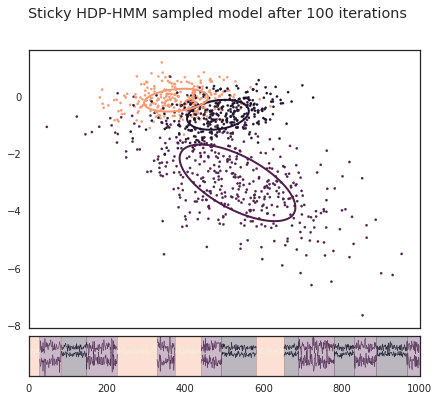

In [23]:
obs_distns = [pyhsmm.distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
posteriormodel = pyhsmm.models.WeakLimitStickyHDPHMM(
        kappa=50.,alpha=6.,gamma=6.,init_state_concentration=1.,
        obs_distns=obs_distns)
posteriormodel.add_data(data)

for idx in progprint_xrange(100):
    posteriormodel.resample_model()

posteriormodel.plot()
plt.gcf().suptitle('Sticky HDP-HMM sampled model after 100 iterations')

# HDP-HSMM

.........................  [  25/150,    0.09sec avg, ETA 11.31 ]
.........................  [  50/150,    0.09sec avg, ETA 8.96 ]
.........................  [  75/150,    0.09sec avg, ETA 6.67 ]
.........................  [ 100/150,    0.09sec avg, ETA 4.45 ]
.........................  [ 125/150,    0.09sec avg, ETA 2.22 ]
.........................  [ 150/150,    0.09sec avg, ETA 0.00 ]

   0.09sec avg, 13.28 total



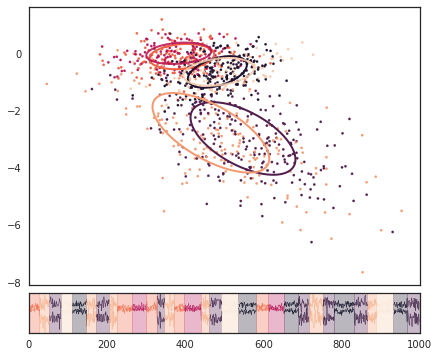

In [11]:
###############
#  load data  #
###############

T = 1000
data = np.loadtxt('example-data.txt')[:T]

#########################
#  posterior inference  #
#########################

# Set the weak limit truncation level
Nmax = 25

# and some hyperparameters
obs_dim = data.shape[1]
obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.25,
                'nu_0':obs_dim+2}
dur_hypparams = {'alpha_0':2*30,
                 'beta_0':2}

obs_distns = [pyhsmm.distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
dur_distns = [pyhsmm.distributions.PoissonDuration(**dur_hypparams) for state in range(Nmax)]

posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
        alpha=6.,gamma=6., # these can matter; see concentration-resampling.py
        init_state_concentration=6., # pretty inconsequential
        obs_distns=obs_distns,
        dur_distns=dur_distns)
posteriormodel.add_data(data,trunc=60) # duration truncation speeds things up when it's possible

for idx in progprint_xrange(150):
    posteriormodel.resample_model()

posteriormodel.plot()

plt.show()

.........................  [  25/100,    0.06sec avg, ETA 4.62 ]
.........................  [  50/100,    0.06sec avg, ETA 3.06 ]
.........................  [  75/100,    0.06sec avg, ETA 1.52 ]
.........................  [ 100/100,    0.06sec avg, ETA 0.00 ]

   0.06sec avg, 6.02 total



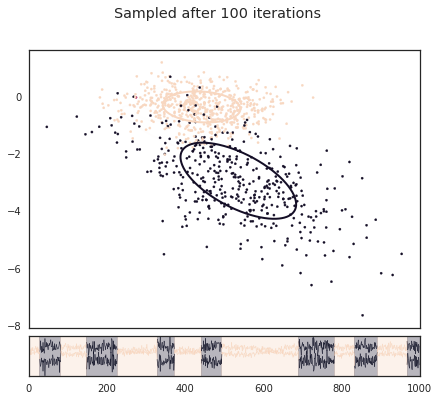

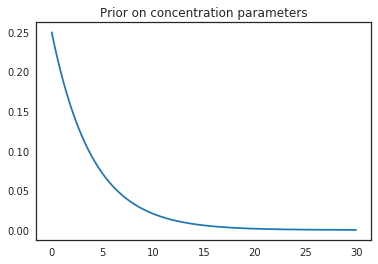

In [30]:
import scipy.stats as stats
T = 1000
data = np.loadtxt('example-data.txt')[:T]

#########################
#  posterior inference  #
#########################

Nmax = 20
obs_dim = data.shape[1]
obs_hypparams = {'mu_0':np.zeros(obs_dim),
                'sigma_0':np.eye(obs_dim),
                'kappa_0':0.25,
                'nu_0':obs_dim+2}
dur_hypparams = {'alpha_0':2*30,
                 'beta_0':2}

obs_distns = [pyhsmm.distributions.Gaussian(**obs_hypparams) for state in range(Nmax)]
dur_distns = [pyhsmm.distributions.PoissonDuration(**dur_hypparams) for state in range(Nmax)]

# posteriormodel = pyhsmm.models.WeakLimitHDPHSMM(
#         # NOTE: instead of passing in alpha_0 and gamma_0, we pass in parameters
#         # for priors over those concentration parameters
#         alpha_a_0=1.,alpha_b_0=1./4,
#         gamma_a_0=1.,gamma_b_0=1./4,
#         init_state_concentration=6.,
#         obs_distns=obs_distns,
#         dur_distns=dur_distns)
# posteriormodel.add_data(data,trunc=70)

posteriormodel = pyhsmm.models.WeakLimitHDPHMM(
        # NOTE: instead of passing in alpha_0 and gamma_0, we pass in parameters
        # for priors over those concentration parameters
        alpha_a_0=1.,alpha_b_0=1./4,
        gamma_a_0=1.,gamma_b_0=1./4,
        init_state_concentration=6.,
        obs_distns=obs_distns)
posteriormodel.add_data(data)

for idx in progprint_xrange(100):
    posteriormodel.resample_model()

plt.figure()
posteriormodel.plot()
plt.gcf().suptitle('Sampled after 100 iterations')

plt.figure()
t = np.linspace(0.01,30,1000)
plt.plot(t,stats.gamma.pdf(t,1.,scale=4.)) # NOTE: numpy/scipy scale is inverted compared to my scale
plt.title('Prior on concentration parameters')

plt.show()

# UAI type plots for inference comparisons

In [25]:
print(posteriormodel.stateseqs[0])

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 12  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 18 18 18 18 18 18 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 18